https://learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/ 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from PIL import Image

from sklearn.cluster import KMeans

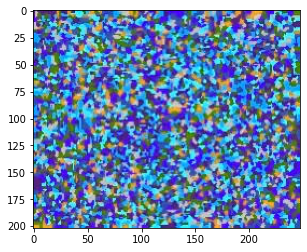

In [3]:
img = cv2.imread("grains")
plt.imshow(img)

colors = np.reshape(img, (-1, 3))

distinct = 8
kmeans = KMeans(n_clusters=distinct, random_state=0).fit(colors)

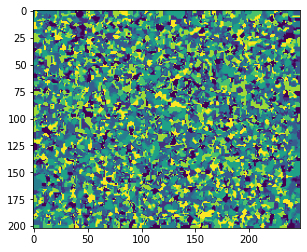

In [4]:
plt.imshow([np.array(np.round(kmeans.cluster_centers_), dtype=np.uint8)])
best_colors = kmeans.cluster_centers_
segmented = np.reshape(kmeans.predict(colors), img.shape[:2])
plt.imshow(segmented)


In [5]:
plot = False
centroids = []
orientation = []
for i in range(distinct):
  thresh = (segmented == i).astype(np.uint8)

  # find contours in the binary image
  contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  for c in contours:
    # calculate moments for each contour
    M = cv2.moments(c)

    # calculate x,y coordinate of center
    try:
      cX = int(M["m10"] / M["m00"])
      cY = int(M["m01"] / M["m00"])
    except:
      continue
    centroids.append([cX, cY])
    orientation.append(i)

    # display the image
    if plot:
      plt.scatter(*c.T)
      plt.scatter([cX], [cY], color="white")
      plt.imshow(img)
      plt.show()

In [6]:
from scipy.spatial import Delaunay
from collections import defaultdict
import itertools

tri = Delaunay(centroids)
neiList=defaultdict(set)
for p in tri.vertices:
    for i,j in itertools.combinations(p,2):
        neiList[i].add(j)
        neiList[j].add(i)

In [ ]:
stats = np.zeros([distinct, distinct])
connectivity = np.zeros([distinct])
#for 
for k, vs in neiList.items():
  connectivity[orientation[k]] += len(vs)
  for v in vs:
    stats[orientation[k]][orientation[v]] += 1

plt.imshow(stats / np.sum(stats, axis=1))

adjacency = stats
#connectivity = np.sum(stats, axis=1) / np.sum(stats)
volume = np.array([np.sum(segmented == i) for i in range(distinct)])/segmented.size
connectivity / np.array([np.sum(np.array(orientation) == i) for i in range(distinct)]),
orientation_fraction = (np.array([np.sum(np.array(orientation) == i) for i in range(distinct)])/len(neiList))
# stats / np.sum(stats, axis=1)
#0.04999307575128099*(np.sum(stats, axis=1)/ np.sum(stats))

#volume * 50547 / np.array([np.sum(np.array(orientation) == i) for i in range(distinct)])

print("Volume Fraction", volume)
print("Orientation Fraction", orientation_fraction)

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
vor = Voronoi(centroids)
voronoi_plot_2d(vor, show_points=False, show_vertices=False)
#for i,p in enumerate(centroids):
#    plt.text(p[0], p[1], '#%d' % i, ha='center')
plt.imshow(segmented)
plt.xlim(0, 240)
plt.ylim(0, 200)
plt.show()

In [ ]:
import matplotlib
from matplotlib import cm


norm = matplotlib.colors.Normalize(vmin=0, vmax=distinct-1)


# colorize
for region, idx in zip(vor.regions, vor.point_region):
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=cm.viridis(norm(orientation[idx])))
plt.xlim(0, 240)
plt.ylim(0, 200)
voronoi_plot_2d(vor, show_points=False, show_vertices=False)
plt.show()
plt.imshow(segmented)
plt.xlim(0, 240)
plt.ylim(0, 200)
plt.show()

plt.title("Orientations")
plt.imshow([[cm.viridis(norm(i)) for i in range(8)]])
plt.yticks([])